In [26]:
import numpy as np
import pandas as pd

Train several models and evaluate how effectively they predict instances of fraud using data based on this dataset from Kaggle.

Each row in fraud_data.csv corresponds to a credit card transaction. Features include confidential variables V1 through V28 as well as Amount which is the amount of the transaction.

The target is stored in the class column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [28]:
def answer_one():
#Import the data from fraud_data.csv. 
# Outputs the percentage of the observations in the dataset are instances of fraud.
    df = pd.read_csv('fraud_data.csv')
    
    return df['Class'].mean()
answer_one()


0.016410823768035772

In [29]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [32]:
def answer_two():
    
    #Trains a dummy classifier that classifies everything as the majority class of the training data. 
    #Outputs the accuracy and recall of this classifier.
    
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    acc = dummy.score(X_test, y_test)
    
    y_dummy_predictions = dummy.predict(X_test)
    rec = recall_score(y_test,y_dummy_predictions)
    return (acc,rec)

answer_two()

(0.9852507374631269, 0.0)

In [33]:
def answer_three():
    
    #trains a SVC classifer using the default parameters. 
    #Outputs the accuracy, recall, and precision of this classifier.
    
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_predicted = svm.predict(X_test)
    acc = accuracy_score(y_test,y_predicted)
    rec = recall_score(y_test,y_predicted)
    pre = precision_score(y_test,y_predicted)
    
    return (acc,rec,pre)

answer_three()


(0.9900442477876106, 0.35, 0.9333333333333333)

In [34]:
def answer_four():
    
    #Using the SVC classifier with parameters {'C': 1e9, 'gamma': 1e-07}
    #outputs the confusion matrix when using a threshold of -220 on the decision function. 
    
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm= SVC(C=1e9,gamma=1e-07).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, y_score_svm)
    
    return confusion 

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

C:\Users\fachreddin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


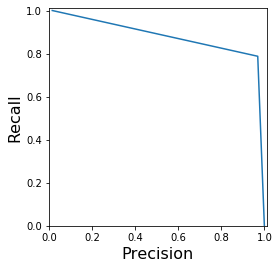

C:\Users\fachreddin\anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


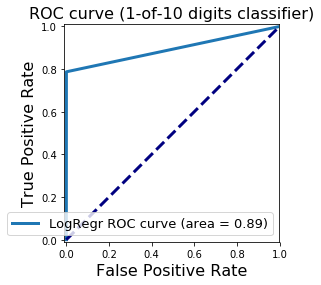

(0.83, 0.83)

In [46]:
%matplotlib inline

def answer_five():
    
    #Trains a logisitic regression classifier with default parameters using X_train and y_train.
    #creates a precision recall curve and a roc curve for the logisitic regression classifier, 
    #using y_test and the probability estimates for X_test (probability it is fraud).

    #Looking at the precision recall curve, what is the recall when the precision is 0.75?
    #Looking at the roc curve, what is the true positive rate when the false positive rate is 0.16?
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    lr = LogisticRegression(max_iter=1000,solver='liblinear').fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    #confusion = confusion_matrix(y_test, lr_predicted)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    #plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    
    from sklearn.metrics import roc_curve, auc
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
    return (0.83,0.83)

answer_five()

In [47]:
def answer_six():

    #Perform a grid search over the parameters listed below for a Logisitic Regression classifier, 
    #using recall for scoring and the default 3-fold cross validation.
    #'penalty': ['l1', 'l2']
    #'C':[0.01, 0.1, 1, 10, 100]
    #From .cv_results_, create an array of the mean test scores of each parameter combination. i.e.
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    \
    clf = LogisticRegression(max_iter=1000,solver='liblinear')
    grid_values = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
    grid_clf.fit(X_train, y_train)
    cv_results = grid_clf.cv_results_
    #y_decision_fn_scores = grid_clf.decision_function(X_test) 
    #print(y_decision_fn_scores)
    out = cv_results['mean_test_score']
    return out.reshape(5,2)

answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935],
       [0.80064935, 0.80064935]])

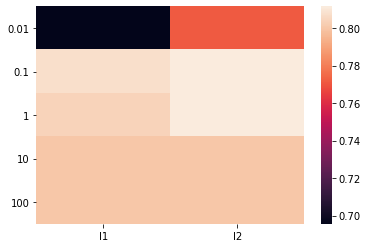

In [49]:
# Use the following function to help visualize results from the grid search
# recall grid for penalty: l1, l2, and C=[0.01,100] 
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())